In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path ="/content/drive/MyDrive/newdataset/balanced.csv"
df = pd.read_csv(path)
df

,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9,...,column67,column68,column69,column70,column71,column72,column73,column74,column75,label
0,-0.384207,-0.717000,-0.010751,-0.009105,-0.083818,-0.007928,-0.353974,0.564957,-0.178106,-0.393591,...,0.886017,-0.140358,-0.106988,-0.158560,-0.111225,-0.632052,-0.112634,-0.638060,-0.621565,0
1,-0.360718,-0.718105,-0.012008,-0.010059,-0.095402,-0.008075,-0.413711,-0.384893,-0.411630,-0.393591,...,0.886017,-0.140358,-0.106988,-0.158560,-0.111225,-0.632052,-0.112634,-0.638060,-0.621565,0
2,-0.384207,-0.717559,-0.010751,-0.009105,-0.083818,-0.007936,-0.353974,0.564957,-0.178106,-0.393591,...,-0.988016,-0.140358,-0.106988,-0.158560,-0.111225,-0.632052,-0.112634,-0.638060,-0.621565,0
3,-0.384207,-0.718104,-0.010751,-0.009105,-0.082598,-0.007979,-0.347686,0.664941,-0.153525,-0.393591,...,0.886017,-0.140358,-0.106988,-0.158560,-0.111225,-0.632052,-0.112634,-0.638060,-0.621565,0
4,-0.384207,-0.717530,-0.012008,-0.010059,-0.087628,-0.008018,-0.333537,0.889905,-0.098216,-0.393591,...,-0.988016,-0.140358,-0.106988,-0.158560,-0.111225,-0.632052,-0.112634,-0.638060,-0.621565,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387513,-0.382581,-0.457746,-0.003211,-0.006243,-0.045710,-0.003201,0.098773,-0.384893,-0.161206,0.089352,...,0.886017,-0.139162,-0.106988,-0.157794,-0.109839,-0.468034,-0.112634,-0.475500,-0.457466,1
387514,-0.382581,-0.457720,-0.006981,-0.006243,-0.023608,-0.006598,0.326719,-0.384893,0.167263,0.488999,...,0.886017,-0.139127,-0.106988,-0.157771,-0.109799,-0.467999,-0.112634,-0.475466,-0.457431,1
387515,-0.382581,-0.457813,-0.004468,-0.005289,-0.047539,-0.003201,0.079909,-0.384893,-0.135967,0.103692,...,0.886017,-0.139152,-0.106988,-0.157788,-0.109829,-0.468133,-0.112634,-0.475599,-0.457566,1
387516,-0.382581,-0.457816,-0.003211,-0.006243,-0.039156,-0.003201,0.166371,-0.384893,-0.128175,0.153053,...,0.886017,-0.139132,-0.106988,-0.157775,-0.109805,-0.468090,-0.112634,-0.475557,-0.457523,1


In [ ]:
df['label'].value_counts()

0    193759
1    193759
Name: label, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387518 entries, 0 to 387517
Data columns (total 77 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   column0   387518 non-null  float64
 1   column1   387518 non-null  float64
 2   column2   387518 non-null  float64
 3   column3   387518 non-null  float64
 4   column4   387518 non-null  float64
 5   column5   387518 non-null  float64
 6   column6   387518 non-null  float64
 7   column7   387518 non-null  float64
 8   column8   387518 non-null  float64
 9   column9   387518 non-null  float64
 10  column10  387518 non-null  float64
 11  column11  387518 non-null  float64
 12  column12  387518 non-null  float64
 13  column13  387518 non-null  float64
 14  column14  387518 non-null  float64
 15  column15  387518 non-null  float64
 16  column16  387518 non-null  float64
 17  column17  387518 non-null  float64
 18  column18  387518 non-null  float64
 19  column19  387518 non-null  float64
 20  colu

In [ ]:
Y = df['label']
X = df.drop('label', axis=1)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
k = 20
K = 20
# Normalize the data
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# Define the autoencoder architecture
input_dim = X_norm.shape[1]
hidden_dim = 10
output_dim = X_norm.shape[1]
input_layer = Input(shape=(input_dim,))
hidden_layer = Dense(hidden_dim, activation='relu')(input_layer)
output_layer = Dense(output_dim, activation='sigmoid')(hidden_layer)

# Compile the autoencoder model
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder model
autoencoder.fit(X_norm, X_norm, epochs=100, batch_size=32, verbose=0)

# Use the trained encoder to perform feature selection
encoder = Model(input_layer, hidden_layer)
X_encoded = encoder.predict(X_norm)

# Get the indices of the top k features based on the sum of the encoder weights
weights = autoencoder.layers[1].get_weights()[0]
feature_scores = np.sum(np.abs(weights), axis=1)
top_feature_indices = np.argsort(feature_scores)[-k:]

# Get the top k feature names and scores
selected_feature_AE = X.columns[top_feature_indices]
selected_feature_scores = feature_scores[top_feature_indices]

# Print the selected features with their column numbers and scores
for idx, (feature_name, score) in zip(top_feature_indices, zip(selected_feature_AE, selected_feature_scores)):
    print(f'Feature {idx+1}: {feature_name} (Column {idx}), Score: {score}')

12110/12110 [==============================] - 16s 1ms/step
Feature 21: column20 (Column 20), Score: 11.641423225402832
Feature 24: column23 (Column 23), Score: 11.685718536376953
Feature 25: column24 (Column 24), Score: 12.221033096313477
Feature 61: column60 (Column 60), Score: 12.652217864990234
Feature 3: column2 (Column 2), Score: 12.865079879760742
Feature 71: column70 (Column 70), Score: 12.870660781860352
Feature 40: column39 (Column 39), Score: 13.628321647644043
Feature 37: column36 (Column 36), Score: 13.713812828063965
Feature 54: column53 (Column 53), Score: 13.716887474060059
Feature 33: column32 (Column 32), Score: 13.996182441711426
Feature 20: column19 (Column 19), Score: 14.323655128479004
Feature 28: column27 (Column 27), Score: 14.45809268951416
Feature 68: column67 (Column 67), Score: 15.039968490600586
Feature 72: column71 (Column 71), Score: 16.433042526245117
Feature 36: column35 (Column 35), Score: 16.738906860351562
Feature 12: column11 (Column 11), Score: 17.

In [ ]:
import numpy as np
top_features = np.array(selected_feature_AE)

In [ ]:
X_train_selected = X[top_features]

In [ ]:
X_train_selected.shape

(387518, 20)

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into 60% training, 20% validation, and 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X_train_selected, Y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


LOGISTIC REGRESSION

  2%|▏         | 2/100 [01:47<1:33:55, 57.51s/trial, best loss: -0.934035744336842]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  3%|▎         | 3/100 [03:22<2:00:13, 74.37s/trial, best loss: -0.934035744336842]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  4%|▍         | 4/100 [04:55<2:10:37, 81.64s/trial, best loss: -0.934035744336842]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  6%|▌         | 6/100 [06:26<1:40:39, 64.25s/trial, best loss: -0.934035744336842]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Li

  7%|▋         | 7/100 [06:39<1:13:27, 47.39s/trial, best loss: -0.934035744336842]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached w

  8%|▊         | 8/100 [08:10<1:34:04, 61.35s/trial, best loss: -0.934035744336842]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm 

  9%|▉         | 9/100 [08:23<1:09:50, 46.05s/trial, best loss: -0.934035744336842]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached w

 10%|█         | 10/100 [09:52<1:28:59, 59.33s/trial, best loss: -0.934035744336842]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm 

 11%|█         | 11/100 [10:04<1:06:46, 45.01s/trial, best loss: -0.934035744336842]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Li

 12%|█▏        | 12/100 [10:17<51:32, 35.14s/trial, best loss: -0.934035744336842]  

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):


 13%|█▎        | 13/100 [10:34<42:49, 29.53s/trial, best loss: -0.934035744336842]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 14%|█▍        | 14/100 [11:13<46:36, 32.52s/trial, best loss: -0.934035744336842]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 15%|█▌        | 15/100 [12:48<1:12:56, 51.49s/trial, best loss: -0.934035744336842]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 16%|█▌        | 16/100 [14:18<1:28:03, 62.89s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _

 17%|█▋        | 17/100 [14:36<1:08:23, 49.44s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the c

 18%|█▊        | 18/100 [16:10<1:25:51, 62.82s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 19%|█▉        | 19/100 [17:16<1:26:03, 63.75s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 20%|██        | 20/100 [18:45<1:35:10, 71.38s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 28%|██▊       | 28/100 [30:41<1:38:29, 82.08s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 29%|██▉       | 29/100 [32:11<1:40:00, 84.51s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 32%|███▏      | 32/100 [34:32<1:13:12, 64.59s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 33%|███▎      | 33/100 [36:07<1:22:10, 73.60s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 34%|███▍      | 34/100 [37:34<1:25:32, 77.76s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _

 35%|███▌      | 35/100 [37:51<1:04:23, 59.44s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 36%|███▌      | 36/100 [38:50<1:03:24, 59.44s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 37%|███▋      | 37/100 [40:24<1:13:14, 69.76s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm 

 38%|███▊      | 38/100 [40:38<54:36, 52.84s/trial, best loss: -0.9341357410070914]  

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached w

 39%|███▉      | 39/100 [42:07<1:04:56, 63.88s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 40%|████      | 40/100 [43:18<1:05:59, 65.99s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Li

 41%|████      | 41/100 [43:34<49:57, 50.80s/trial, best loss: -0.9341357410070914]  

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



 42%|████▏     | 42/100 [44:41<54:01, 55.90s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 43%|████▎     | 43/100 [46:13<1:03:25, 66.76s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocess

 44%|████▍     | 44/100 [46:30<48:18, 51.76s/trial, best loss: -0.9341357410070914]  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge

 45%|████▌     | 45/100 [46:43<36:50, 40.19s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached w

 46%|████▌     | 46/100 [48:19<51:03, 56.73s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 48%|████▊     | 48/100 [50:01<44:20, 51.15s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _

 49%|████▉     | 49/100 [50:18<34:45, 40.90s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the c

 50%|█████     | 50/100 [51:49<46:34, 55.88s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 51%|█████     | 51/100 [53:24<55:20, 67.76s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm 

 52%|█████▏    | 52/100 [53:36<40:49, 51.04s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



 55%|█████▌    | 55/100 [57:38<51:04, 68.10s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _

 56%|█████▌    | 56/100 [57:55<38:39, 52.71s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the c

 57%|█████▋    | 57/100 [59:23<45:24, 63.37s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 58%|█████▊    | 58/100 [59:53<37:16, 53.25s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 59%|█████▉    | 59/100 [1:01:26<44:34, 65.22s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm 

 60%|██████    | 60/100 [1:01:39<33:03, 49.59s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



 62%|██████▏   | 62/100 [1:03:54<36:30, 57.65s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _

 63%|██████▎   | 63/100 [1:04:11<27:58, 45.37s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 64%|██████▍   | 64/100 [1:05:27<32:48, 54.67s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 65%|██████▌   | 65/100 [1:06:57<38:05, 65.31s/trial, best loss: -0.9341357410070914]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 74%|███████▍  | 74/100 [1:20:42<38:40, 89.25s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 75%|███████▌  | 75/100 [1:22:17<37:55, 91.02s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm 

 76%|███████▌  | 76/100 [1:22:31<27:03, 67.64s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



 79%|███████▉  | 79/100 [1:26:23<27:02, 77.26s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _

 80%|████████  | 80/100 [1:26:40<19:45, 59.29s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the c

 81%|████████  | 81/100 [1:28:10<21:40, 68.43s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 82%|████████▏ | 82/100 [1:29:45<22:56, 76.45s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 83%|████████▎ | 83/100 [1:30:53<20:55, 73.82s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Li

 84%|████████▍ | 84/100 [1:31:05<14:44, 55.25s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



 86%|████████▌ | 86/100 [1:32:32<11:59, 51.41s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _

 87%|████████▋ | 87/100 [1:32:50<08:59, 41.50s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 88%|████████▊ | 88/100 [1:33:53<09:34, 47.90s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 89%|████████▉ | 89/100 [1:35:23<11:05, 60.48s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 90%|█████████ | 90/100 [1:37:02<12:00, 72.08s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 91%|█████████ | 91/100 [1:38:38<11:52, 79.12s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Li

 92%|█████████▏| 92/100 [1:38:49<07:51, 58.91s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



 94%|█████████▍| 94/100 [1:40:51<06:06, 61.07s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _

 95%|█████████▌| 95/100 [1:41:08<03:58, 47.76s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the c

 96%|█████████▌| 96/100 [1:42:36<04:00, 60.02s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 97%|█████████▋| 97/100 [1:43:25<02:50, 56.69s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 98%|█████████▊| 98/100 [1:45:00<02:15, 67.94s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm 

 99%|█████████▉| 99/100 [1:45:12<00:51, 51.39s/trial, best loss: -0.9341518694150267]

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")



100%|██████████| 100/100 [1:46:30<00:00, 63.90s/trial, best loss: -0.9341518694150267]
Logistic Regression Validation Evaluation Metrics:
Accuracy: 0.9371645334434352
Precision: 0.9740033688938798
Recall: 0.8979243232051348
F1 Score: 0.9344178405020335
AUC-ROC: 0.9370494358268251
Logistic Regression Testing Evaluation Metrics:
Accuracy: 0.934222749793559
Precision: 0.9734155916993831
Recall: 0.8932118779270238
F1 Score: 0.931590671211186
AUC-ROC: 0.9343394931273751
Logistic Regression Training Evaluation Metrics:
Accuracy: 0.9342739360157928
Precision: 0.9709983697515445
Recall: 0.8952899509060764
F1 Score: 0.9316085549722756
AUC-ROC: 0.9342744390187298


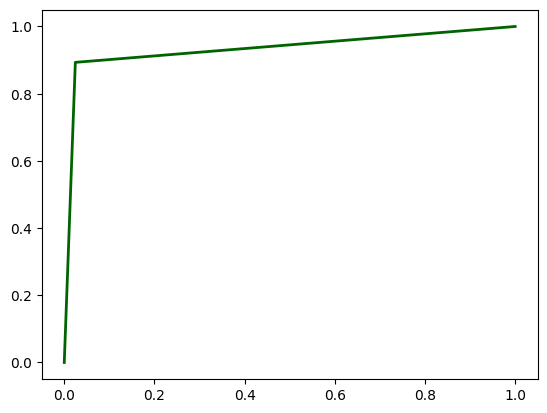

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, roc_curve)
from hyperopt import fmin, tpe, hp
from functools import partial
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# Define the search space for hyperparameters
space = {
    'C': hp.loguniform('C', -5, 2),
    'solver': hp.choice('solver', [0, 1, 2, 3, 4]),
}

# Define the objective function to minimize
def objective(params, X, y):
    solver_dict = {0: 'newton-cg', 1: 'lbfgs', 2: 'liblinear', 3: 'sag', 4: 'saga'}
    params['solver'] = solver_dict[params['solver']]
    model = LogisticRegression(**params, random_state=42)
    score = make_scorer(roc_auc_score)
    return -np.mean(cross_val_score(model, X, y, cv=5, scoring=score))

# Optimize the hyperparameters using TPE
trials = 100
best = fmin(fn=partial(objective, X=X_train, y=y_train),
            space=space,
            algo=tpe.suggest,
            max_evals=trials,
            verbose=2)

# Update the 'solver' parameter in the 'best' dictionary with the corresponding string value
solver_dict = {0: 'newton-cg', 1: 'lbfgs', 2: 'liblinear', 3: 'sag', 4: 'saga'}
best['solver'] = solver_dict[best['solver']]

# Train the logistic regression model with the best hyperparameters
model_lr = LogisticRegression(**best, random_state=42)
model_lr.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lr_val = model_lr.predict(X_val)

# Evaluate the logistic regression model on the validation set
accuracy_lr_val = accuracy_score(y_val, y_pred_lr_val)
precision_lr_val = precision_score(y_val, y_pred_lr_val)
recall_lr_val = recall_score(y_val, y_pred_lr_val)
f1_lr_val = f1_score(y_val, y_pred_lr_val)
auc_roc_lr_val = roc_auc_score(y_val, y_pred_lr_val)

# Print the evaluation metrics for logistic regression on the validation set
print("Logistic Regression Validation Evaluation Metrics:")
print("Accuracy:", accuracy_lr_val)
print("Precision:", precision_lr_val)
print("Recall:", recall_lr_val)
print("F1 Score:", f1_lr_val)
print("AUC-ROC:", auc_roc_lr_val)

# Make predictions on the testing set
y_pred_lr_test = model_lr.predict(X_test)

# Evaluate the logistic regression model on the testing set
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
precision_lr_test = precision_score(y_test, y_pred_lr_test)
recall_lr_test = recall_score(y_test, y_pred_lr_test)
f1_lr_test = f1_score(y_test, y_pred_lr_test)
auc_roc_lr_test = roc_auc_score(y_test, y_pred_lr_test)

# Print the evaluation metrics for logistic regression on the testing set
print("Logistic Regression Testing Evaluation Metrics:")
print("Accuracy:", accuracy_lr_test)
print("Precision:", precision_lr_test)
print("Recall:", recall_lr_test)
print("F1 Score:", f1_lr_test)
print("AUC-ROC:", auc_roc_lr_test)

# Make predictions on the training set
y_pred_lr_train = model_lr.predict(X_train)

# Evaluate the logistic regression model on the training set
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
precision_lr_train = precision_score(y_train, y_pred_lr_train)
recall_lr_train = recall_score(y_train, y_pred_lr_train)
f1_lr_train = f1_score(y_train, y_pred_lr_train)
auc_roc_lr_train = roc_auc_score(y_train, y_pred_lr_train)

# Print the evaluation metrics for logistic regression on the training set
print("Logistic Regression Training Evaluation Metrics:")
print("Accuracy:", accuracy_lr_train)
print("Precision:", precision_lr_train)
print("Recall:", recall_lr_train)
print("F1 Score:", f1_lr_train)
print("AUC-ROC:", auc_roc_lr_train)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the logistic regression model on the testing set
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr_test)

# Calculate the area under the ROC curve (AUC-ROC) for the logistic regression model on the testing set
auc_roc_lr = roc_auc_score(y_test, y_pred_lr_test)

# Plot the ROC curve for the logistic regression model on the testing set
plt.plot(fpr_lr, tpr_lr, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_lr)

MLPClassifier Cross-Validation Scores: [0.98640388 0.98719417 0.98716191 0.98701676 0.98646818]
MLPClassifier Cross-Validation Mean Score: 0.9868489797854247
MLPClassifier Validation Evaluation Metrics:
Accuracy: 0.9880006193228736
Precision: 0.989460020768432
Recall: 0.9864382214400331
F1 Score: 0.9879468104409134
AUC-ROC: 0.9879960365678012
MLPClassifier Testing Evaluation Metrics:
Accuracy: 0.9870458298926507
Precision: 0.9892478676660635
Recall: 0.9848695383665277
F1 Score: 0.9870538477408706
AUC-ROC: 0.987052025018883
MLPClassifier Training Evaluation Metrics:
Accuracy: 0.9885295502783745
Precision: 0.9894706905132796
Recall: 0.98756846376662
F1 Score: 0.988518662017306
AUC-ROC: 0.9885295626790906


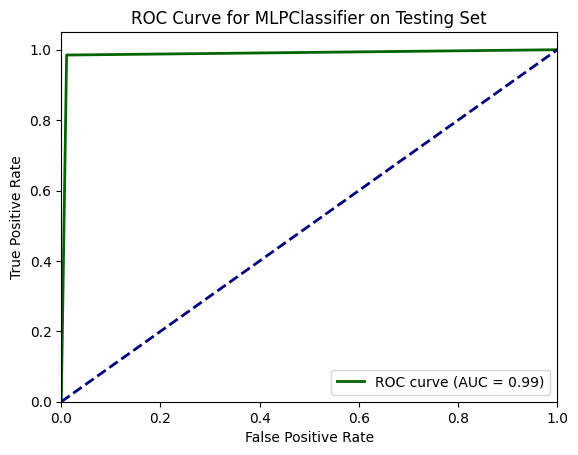

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train the MLPClassifier model
model_mlp = MLPClassifier()
cv_scores_mlp = cross_val_score(model_mlp, X_train, y_train, cv=5)
print("MLPClassifier Cross-Validation Scores:", cv_scores_mlp)
print("MLPClassifier Cross-Validation Mean Score:", cv_scores_mlp.mean())
model_mlp.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_mlp_val = model_mlp.predict(X_val)

# Evaluate the MLPClassifier model on the validation set
accuracy_mlp_val = accuracy_score(y_val, y_pred_mlp_val)
precision_mlp_val = precision_score(y_val, y_pred_mlp_val)
recall_mlp_val = recall_score(y_val, y_pred_mlp_val)
f1_mlp_val = f1_score(y_val, y_pred_mlp_val)
auc_roc_mlp_val = roc_auc_score(y_val, y_pred_mlp_val)

# Print the evaluation metrics for MLPClassifier on the validation set
print("MLPClassifier Validation Evaluation Metrics:")
print("Accuracy:", accuracy_mlp_val)
print("Precision:", precision_mlp_val)
print("Recall:", recall_mlp_val)
print("F1 Score:", f1_mlp_val)
print("AUC-ROC:", auc_roc_mlp_val)

# Make predictions on the testing set
y_pred_mlp_test = model_mlp.predict(X_test)

# Evaluate the MLPClassifier model on the testing set
accuracy_mlp_test = accuracy_score(y_test, y_pred_mlp_test)
precision_mlp_test = precision_score(y_test, y_pred_mlp_test)
recall_mlp_test = recall_score(y_test, y_pred_mlp_test)
f1_mlp_test = f1_score(y_test, y_pred_mlp_test)
auc_roc_mlp_test = roc_auc_score(y_test, y_pred_mlp_test)

# Print the evaluation metrics for MLPClassifier on the testing set
print("MLPClassifier Testing Evaluation Metrics:")
print("Accuracy:", accuracy_mlp_test)
print("Precision:", precision_mlp_test)
print("Recall:", recall_mlp_test)
print("F1 Score:", f1_mlp_test)
print("AUC-ROC:", auc_roc_mlp_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the MLPClassifier model on the testing set
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp_test)

# Calculate the area under the ROC curve (AUC-ROC) for the MLPClassifier model on the testing set
auc_roc_mlp = roc_auc_score(y_test, y_pred_mlp_test)


# Make predictions on the training set
y_pred_mlp_train = model_mlp.predict(X_train)

# Evaluate the MLPClassifier model on the training set
accuracy_mlp_train = accuracy_score(y_train, y_pred_mlp_train)
precision_mlp_train = precision_score(y_train, y_pred_mlp_train)
recall_mlp_train = recall_score(y_train, y_pred_mlp_train)
f1_mlp_train = f1_score(y_train, y_pred_mlp_train)
auc_roc_mlp_train = roc_auc_score(y_train, y_pred_mlp_train)

# Print the evaluation metrics for MLPClassifier on the training set
print("MLPClassifier Training Evaluation Metrics:")
print("Accuracy:", accuracy_mlp_train)
print("Precision:", precision_mlp_train)
print("Recall:", recall_mlp_train)
print("F1 Score:", f1_mlp_train)
print("AUC-ROC:", auc_roc_mlp_train)
# Plot the ROC curve for the MLPClassifier model on the testing set
plt.plot(fpr_mlp, tpr_mlp, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLPClassifier on Testing Set')
plt.legend(loc="lower right")
plt.show()

ExtraTreesClassifier Cross-Validation Scores: [0.99570989 0.99553247 0.99609696 0.9958873  0.99498403]
ExtraTreesClassifier Cross-Validation Mean Score: 0.9956421301680007
ExtraTreesClassifier Validation Evaluation Metrics:
Accuracy: 0.9951228323699421
Precision: 0.9959041891331398
Recall: 0.9943061235053574
F1 Score: 0.9951045147253089
AUC-ROC: 0.9951204368362994
ExtraTreesClassifier Testing Evaluation Metrics:
Accuracy: 0.9950454170107349
Precision: 0.9960806559744211
Recall: 0.9940301579949565
F1 Score: 0.9950543506259337
AUC-ROC: 0.9950483070912624
ExtraTreesClassifier Training Evaluation Metrics:
Accuracy: 0.9984871650957698
Precision: 0.9996378966971006
Recall: 0.9973356385758246
F1 Score: 0.9984854405301281
AUC-ROC: 0.9984871799536973


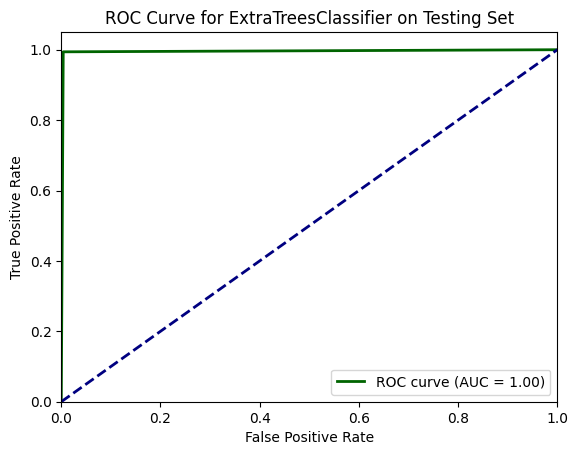

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Train the ExtraTreesClassifier model
model_et = ExtraTreesClassifier()
cv_scores_et = cross_val_score(model_et, X_train, y_train, cv=5)
print("ExtraTreesClassifier Cross-Validation Scores:", cv_scores_et)
print("ExtraTreesClassifier Cross-Validation Mean Score:", cv_scores_et.mean())
model_et.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_et_val = model_et.predict(X_val)

# Evaluate the ExtraTreesClassifier model on the validation set
accuracy_et_val = accuracy_score(y_val, y_pred_et_val)
precision_et_val = precision_score(y_val, y_pred_et_val)
recall_et_val = recall_score(y_val, y_pred_et_val)
f1_et_val = f1_score(y_val, y_pred_et_val)
auc_roc_et_val = roc_auc_score(y_val, y_pred_et_val)

# Print the evaluation metrics for ExtraTreesClassifier on the validation set
print("ExtraTreesClassifier Validation Evaluation Metrics:")
print("Accuracy:", accuracy_et_val)
print("Precision:", precision_et_val)
print("Recall:", recall_et_val)
print("F1 Score:", f1_et_val)
print("AUC-ROC:", auc_roc_et_val)

# Make predictions on the testing set
y_pred_et_test = model_et.predict(X_test)

# Evaluate the ExtraTreesClassifier model on the testing set
accuracy_et_test = accuracy_score(y_test, y_pred_et_test)
precision_et_test = precision_score(y_test, y_pred_et_test)
recall_et_test = recall_score(y_test, y_pred_et_test)
f1_et_test = f1_score(y_test, y_pred_et_test)
auc_roc_et_test = roc_auc_score(y_test, y_pred_et_test)

# Print the evaluation metrics for ExtraTreesClassifier on the testing set
print("ExtraTreesClassifier Testing Evaluation Metrics:")
print("Accuracy:", accuracy_et_test)
print("Precision:", precision_et_test)
print("Recall:", recall_et_test)
print("F1 Score:", f1_et_test)
print("AUC-ROC:", auc_roc_et_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ExtraTreesClassifier model on the testing set
fpr_et, tpr_et, thresholds_et = roc_curve(y_test, y_pred_et_test)

# Calculate the area under the ROC curve (AUC-ROC) for the ExtraTreesClassifier model on the testing set
auc_roc_et = roc_auc_score(y_test, y_pred_et_test)

# Make predictions on the training set
y_pred_et_train = model_et.predict(X_train)

# Evaluate the ExtraTreesClassifier model on the training set
accuracy_et_train = accuracy_score(y_train, y_pred_et_train)
precision_et_train = precision_score(y_train, y_pred_et_train)
recall_et_train = recall_score(y_train, y_pred_et_train)
f1_et_train = f1_score(y_train, y_pred_et_train)
auc_roc_et_train = roc_auc_score(y_train, y_pred_et_train)

# Print the evaluation metrics for ExtraTreesClassifier on the training set
print("ExtraTreesClassifier Training Evaluation Metrics:")
print("Accuracy:", accuracy_et_train)
print("Precision:", precision_et_train)
print("Recall:", recall_et_train)
print("F1 Score:", f1_et_train)
print("AUC-ROC:", auc_roc_et_train)

# Plot the ROC curve for the ExtraTreesClassifier model on the testing set
plt.plot(fpr_et, tpr_et, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_et)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ExtraTreesClassifier on Testing Set')
plt.legend(loc="lower right")
plt.show()